# plate detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car = cv2.imread(r'C:\Users\Data\computer vision\car_plate.jpg')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

In [3]:
def display(img):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img)

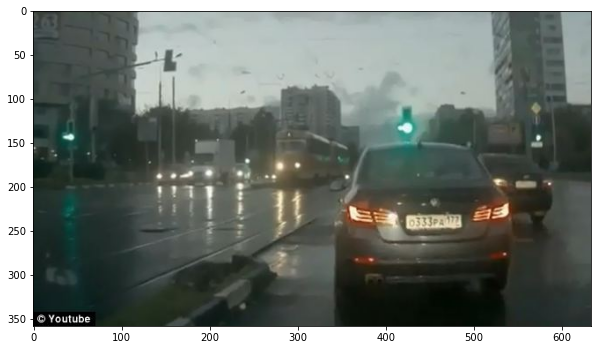

In [4]:
display(car)

In [5]:
cascade = cv2.CascadeClassifier(r'C:\Users\Data\computer vision\haarcascades\haarcascade_russian_plate_number.xml')

In [6]:
def detect_plate(img):
    plate = img.copy()
    plate_rectangle = cascade.detectMultiScale(plate, scaleFactor= 1.3, minNeighbors = 3)
    
    for (x,y,w,h) in plate_rectangle:
        cv2.rectangle(plate, (x,y),(x+w, y+h), (255,0,0), 2)
    return plate    

In [7]:
result = detect_plate(car)

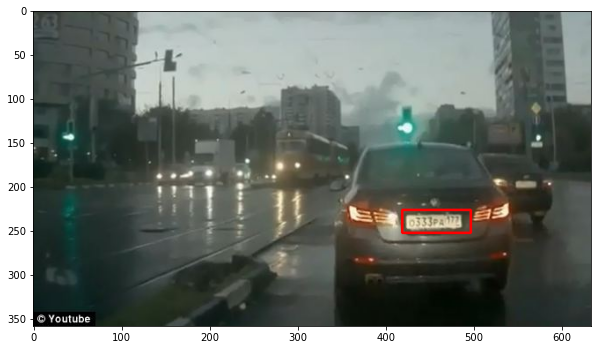

In [8]:
display(result)

--------
-------
## plate Blur

In [9]:
def detect_plate_blur(img):
    plate = img.copy()
    roi = img.copy()
    
    plate_rect = cascade.detectMultiScale(plate, scaleFactor = 1.3, minNeighbors = 3)
    
    for (x,y,w,h) in plate_rect:
        roi = roi[y: y+h, x:x+w]
        roi_blur = cv2.medianBlur(roi, 9)
        
        plate[y: y+h, x:x+w] = roi_blur
    return plate

In [10]:
result = detect_plate_blur(car)

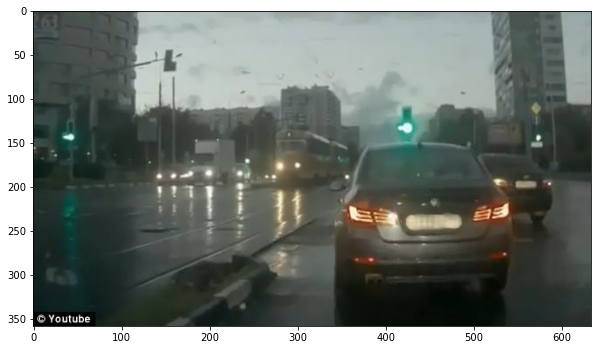

In [11]:
display(result)